In [17]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.express as px
import numpy as np
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, InputLayer
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [18]:
df = pd.read_csv('/kaggle/input/age-gender-and-ethnicity-face-data-csv/age_gender.csv')

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

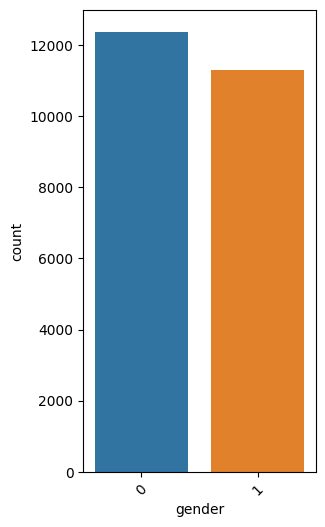

In [19]:
plt.figure(figsize=(3,6))
sns.countplot(data=df, x='gender')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

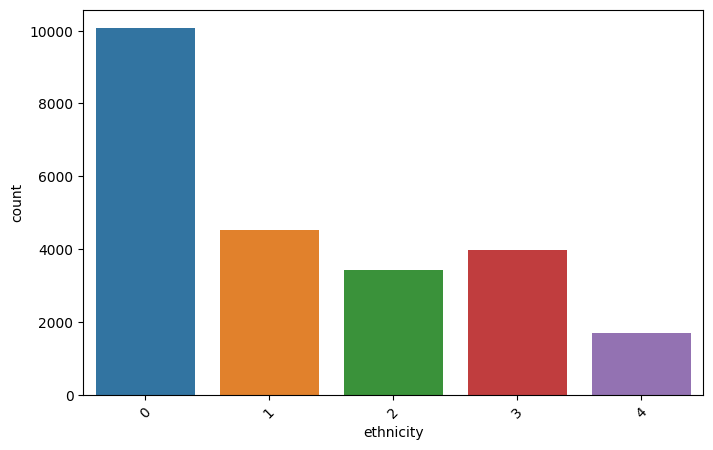

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='ethnicity')
plt.xticks(rotation=45)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0,

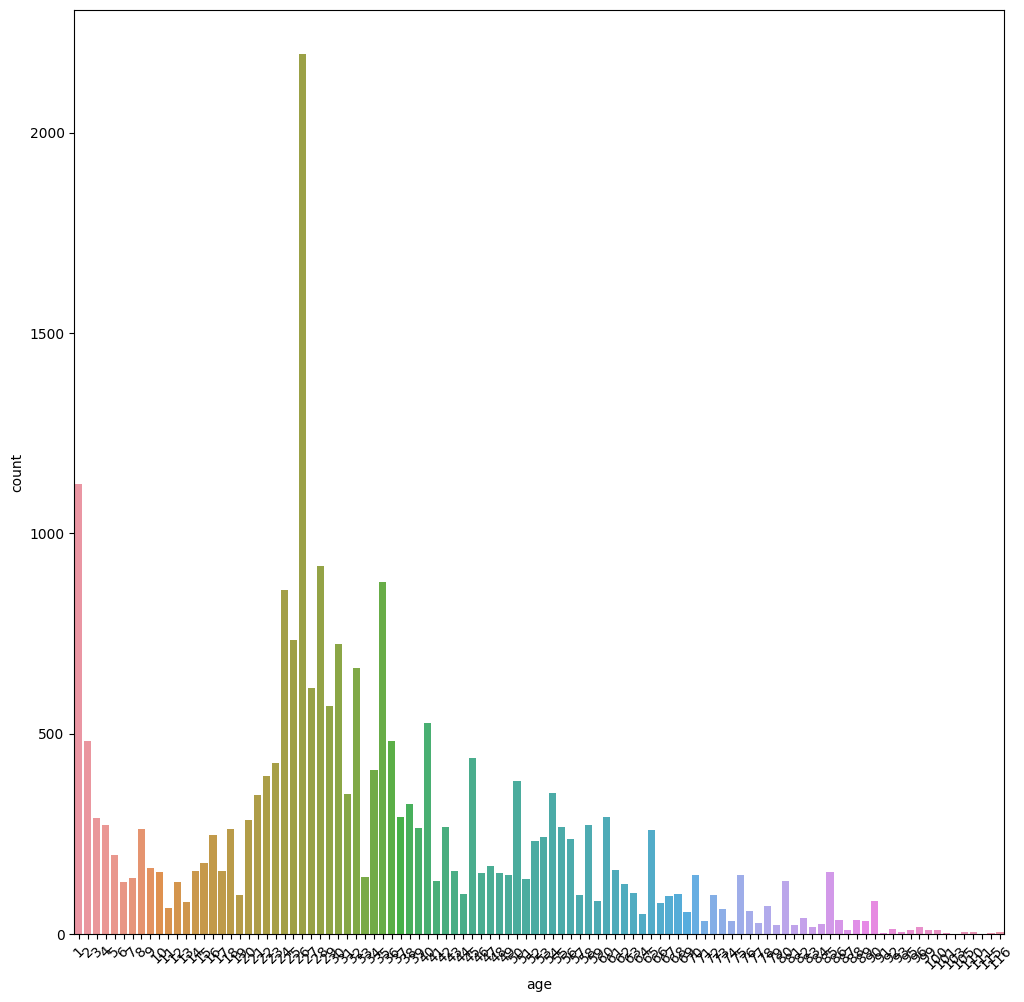

In [21]:
plt.figure(figsize=(12,12))
sns.countplot(data=df, x='age')
plt.xticks(rotation=45)

In [22]:
df.shape

(23705, 5)

In [23]:
df['age'].value_counts()

age
26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
101       2
91        2
111       1
103       1
Name: count, Length: 104, dtype: int64

In [24]:
df['ethnicity'].value_counts()

ethnicity
0    10078
1     4526
3     3975
2     3434
4     1692
Name: count, dtype: int64

In [25]:
df['gender'].value_counts()

gender
0    12391
1    11314
Name: count, dtype: int64

In [26]:
#check this line again
df['pixels']=df['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

In [28]:
X = np.array(df['pixels'].tolist())
X.shape

(23705, 2304)

In [30]:
X[2] #first row

array([ 67.,  70.,  71., ..., 112., 111., 108.], dtype=float32)

In [32]:
X= X.reshape(-1,48,48,1)

In [33]:
X[0].shape

(48, 48, 1)

Text(0.5, 0, 'Age:1  Ethnicity:2  Gender:0')

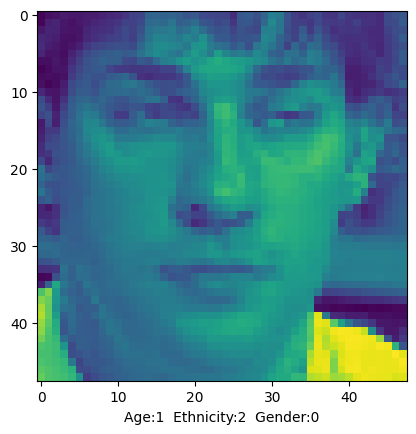

In [39]:
#Check this codeblock
plt.imshow(X[12342])
plt.xlabel(
        "Age:"+str(df['age'].iloc[0])+
        "  Ethnicity:"+str(df['ethnicity'].iloc[0])+
        "  Gender:"+ str(df['gender'].iloc[0])
    )

In [40]:
df["age"] = pd.cut(df["age"],bins=[0,5,20,40,65,116],labels=["0","1","2","3","4"])

In [41]:
y= to_categorical(np.array(df['age']),num_classes=5)

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 20)

In [44]:
model_age = Sequential()
model_age.add(Conv2D(16,kernel_size=(3,3),activation='relu',padding='same',input_shape=(48,48,1),kernel_regularizer=l2(0.01)))
model_age.add(BatchNormalization())
model_age.add(MaxPool2D(pool_size=(2,2)))

model_age.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=l2(0.01)))
model_age.add(BatchNormalization())
model_age.add(MaxPool2D(pool_size=(2,2)))

model_age.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=l2(0.01)))
model_age.add(MaxPool2D(pool_size=(2,2)))
model_age.add(Flatten())

model_age.add(Dense(256,activation='relu',kernel_regularizer=l2(0.01)))
model_age.add(Dropout(0.5))
model_age.add(Dense(5,activation='softmax'))

# sgd = tf.keras.optimizers.SGD(momentum=0.9)
model_age.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
early_stopping = EarlyStopping(patience=10, min_delta=0.001,restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_mean_squared_error', patience=3, verbose=1, 
                                            factor=0.5, min_lr=0.00001)

In [46]:
epochs = 200 
batch_size = 64

history_age = model_age.fit(X_train, y_train, batch_size=batch_size,
                              epochs = epochs, validation_data = (X_test,y_test), steps_per_epoch= X_train.shape[0] // batch_size, callbacks= [early_stopping, learning_rate_reduction])

Epoch 1/200
296/296 [==============================] - 31s 99ms/step - loss: 2.9552 - accuracy: 0.6012 - val_loss: 1.4389 - val_accuracy: 0.6864 - lr: 0.0010
Epoch 2/200
296/296 [==============================] - 29s 100ms/step - loss: 1.1792 - accuracy: 0.6903 - val_loss: 1.0499 - val_accuracy: 0.6880 - lr: 0.0010
Epoch 3/200
296/296 [==============================] - 30s 100ms/step - loss: 0.9488 - accuracy: 0.7096 - val_loss: 1.0402 - val_accuracy: 0.6448 - lr: 0.0010
Epoch 4/200
296/296 [==============================] - 30s 100ms/step - loss: 0.8784 - accuracy: 0.7252 - val_loss: 0.8786 - val_accuracy: 0.7152 - lr: 0.0010
Epoch 5/200
296/296 [==============================] - 29s 98ms/step - loss: 0.8457 - accuracy: 0.7331 - val_loss: 1.7026 - val_accuracy: 0.3780 - lr: 0.0010
Epoch 6/200
296/296 [==============================] - 28s 96ms/step - loss: 0.8328 - accuracy: 0.7417 - val_loss: 0.8533 - val_accuracy: 0.7214 - lr: 0.0010
Epoch 7/200
296/296 [============================

In [47]:
fig = px.line(
    history_age.history, y=['loss', 'val_loss'],
    labels={'index': 'epoch', 'value': 'loss'}, 
    title='Training History')
fig.show()

In [48]:
loss, acc = model_age.evaluate(X_test, y_test, verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.7716817259788513
Test Accuracy: 0.7650284767150879


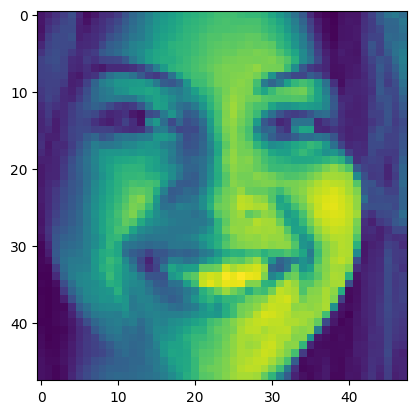

In [54]:
plt.imshow(X_test[967])

In [55]:
input_image = np.expand_dims(X_test[967], axis=0)

predictions = model_age.predict(input_image)
np.argmax(predictions)

1/1 [==============================] - 0s 24ms/step


2

In [56]:
y= df['gender']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [57]:
model_gender = Sequential()
model_gender.add(Conv2D(16,kernel_size=(3,3),activation='relu',padding='same',input_shape=(48,48,1),kernel_regularizer=l2(0.01)))
model_gender.add(BatchNormalization())
model_gender.add(MaxPool2D(pool_size=(2,2)))

model_gender.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=l2(0.01)))
model_gender.add(BatchNormalization())
model_gender.add(MaxPool2D(pool_size=(2,2)))

model_gender.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=l2(0.01)))
model_gender.add(MaxPool2D(pool_size=(2,2)))
model_gender.add(Flatten())

model_gender.add(Dense(256,activation='relu'))
model_gender.add(Dropout(0.5))
model_gender.add(Dense(1,activation='sigmoid'))

sgd = tf.keras.optimizers.SGD(momentum=0.9)
model_gender.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [58]:
early_stopping = EarlyStopping(patience=10, min_delta=0.001,restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, 
                                            factor=0.5, min_lr=0.00001)

In [59]:
epochs = 200  
batch_size = 64

history_gender = model_gender.fit(X_train, y_train, batch_size=batch_size,
                              epochs = epochs, validation_data = (X_test,y_test), steps_per_epoch= X_train.shape[0] // batch_size, callbacks= [early_stopping, learning_rate_reduction])

Epoch 1/200
296/296 [==============================] - 30s 97ms/step - loss: 0.8922 - accuracy: 0.7772 - val_loss: 0.5640 - val_accuracy: 0.8589 - lr: 0.0010
Epoch 2/200
296/296 [==============================] - 28s 95ms/step - loss: 0.4657 - accuracy: 0.8684 - val_loss: 0.3970 - val_accuracy: 0.8808 - lr: 0.0010
Epoch 3/200
296/296 [==============================] - 29s 97ms/step - loss: 0.3782 - accuracy: 0.8837 - val_loss: 0.3488 - val_accuracy: 0.8916 - lr: 0.0010
Epoch 4/200
296/296 [==============================] - 28s 94ms/step - loss: 0.3457 - accuracy: 0.8919 - val_loss: 0.3537 - val_accuracy: 0.8861 - lr: 0.0010
Epoch 5/200
296/296 [==============================] - 28s 95ms/step - loss: 0.3303 - accuracy: 0.8967 - val_loss: 0.3486 - val_accuracy: 0.8850 - lr: 0.0010
Epoch 6/200
296/296 [==============================] - 29s 97ms/step - loss: 0.3189 - accuracy: 0.8995 - val_loss: 0.3473 - val_accuracy: 0.8829 - lr: 0.0010
Epoch 7/200
296/296 [==============================]

In [60]:
fig = px.line(
    history_gender.history, y=['loss', 'val_loss'],
    labels={'index': 'epoch', 'value': 'loss'}, 
    title='Training History')
fig.show()

In [61]:
loss, acc = model_gender.evaluate(X_test, y_test, verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.334206223487854
Test Accuracy: 0.8907403349876404


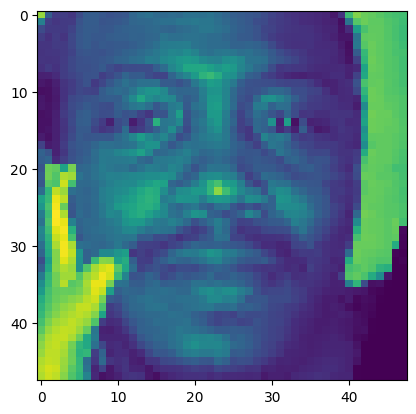

In [63]:
plt.imshow(X_test[1])


In [68]:
input_image = np.expand_dims(X_test[1], axis=0)

predictions = model_gender.predict(input_image)
np.argmax(predictions)

1/1 [==============================] - 0s 25ms/step


0